In [5]:
import pandas as pd
import requests
import numpy as np
from requests_html import HTMLSession
from bs4 import BeautifulSoup
from urllib.error import URLError, HTTPError
from urllib.request import Request,urlopen
import json
from time import sleep

In [6]:
# Tentar simular o acesso ao site e a API ao mesmo tempo para tentar conseguir acesso a API

url_site = 'https://www.fundsexplorer.com.br/ranking'
url_api = 'https://www.fundsexplorer.com.br/wp-json/funds/v1/get-ranking'
headers = {
    'User-Agent': 
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36'
        ' (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36'
}

session = HTMLSession()

In [152]:
response_site = session.get(url_site, headers=headers)
sleep(1)
response_api = session.get(url_api, headers=headers)
html = response_site.content
json_data = response_api.json()
dados = BeautifulSoup(html, "html.parser")
if response_site.status_code == 200:
    df = pd.read_html(response_site.content, encoding='utf-8')[0]
else:
    print("Falha na chamada do site")
if response_api.status_code == 200:
    df = pd.read_html(response_api.content, encoding='utf-8')[0]
else:
    print("Falha na chamada da API")
session.close()
print(json_data)

Falha na chamada da API
{'code': 'rest_forbidden', 'message': 'Sem permissão para fazer isso.', 'data': {'status': 401}}


In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests

# Configuração do navegador Chrome em modo headless
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--disable-gpu')
options.add_argument('--no-sandbox')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3')

# Inicializa o driver do Chrome
driver = webdriver.Chrome(options=options)

# Abre a página desejada
driver.get(url_site)

# Espera até que o elemento <tr> com a classe "loading-skeleton" seja transformado
# try:
#     WebDriverWait(driver, 10).until(
#         lambda driver: driver.find_element(By.CSS_SELECTOR, 'tr.loading-skeleton td:not(.skeleton-td)').get_attribute('class') != 'skeleton-td'
#     )
# except:
#     print("Falha ao carregar o elemento")

# Obtém os cookies do navegador
cookies = driver.get_cookies()

# Cria uma sessão do requests e define os cookies obtidos
session = requests.Session()
for cookie in cookies:
    session.cookies.set(cookie['name'], cookie['value'])

# Realiza a chamada da API com os cookies do navegador
response_site = session.request(method="get", url=url_site)
response_api = session.request(url=url_api, method="get")

# Verifica se a chamada foi bem-sucedida e imprime os dados
if response_api.status_code == 200:
    json_data = response_api.json()
    print(json_data)
else:
    print("Falha na chamada da API:", response_api.status_code)

# Encerra o driver do Chrome
driver.quit()

Falha na chamada da API: 401


In [16]:
import scrapy
import json

headers = {"X-Funds-Nonce":" 61495f60b533cc40ad822e054998a3190ea9bca0d94791a1da"}

class FiispiderSpider(scrapy.Spider):
    name = "fiispider"
    allowed_domains = ["fundsexplorer.com.br"]
    
    def start_requests(self):
        start_urls = ["https://www.fundsexplorer.com.br/wp-json/funds/v1/get-ranking"]
        for url in start_urls:
            yield scrapy.Request(url, headers=headers)

    def parse(self, response):
        for row in json.loads(response.json()):
            yield row

In [36]:
from bs4 import BeautifulSoup

# Obtem o conteúdo da página
html = session.get(url_site).content

# Cria um objeto BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Encontra todos os elementos <td> com a classe data-collum
tds = soup.find_all('td', class_='data-collum')

# Imprime os resultados
for td in tds:
    print(td)

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL da página da web que você deseja analisar
url = 'https://www.fundsexplorer.com.br/ranking'

# Fazer uma requisição HTTP para obter o conteúdo da página
response = requests.get(url)

# Parse o HTML com BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Encontra todas as tags <td> com a classe "skeleton-td"
td_elements = soup.find_all('td', class_='skeleton-td')

# Itera sobre os elementos encontrados e printa o conteúdo
for td in td_elements:
    print(td.text.strip())  # .strip() para remover espaços em branco extras


In [ ]:
try:
    req = Request(url, headers= {'User-Agent':'Mozzila/5.0'})
    response = urlopen(req)
    html = response.read()
    print(html)
except HTTPError as e:
          print(e.status, e.reason)
except URLError as e:
    print(e.reason)

In [40]:
dados=BeautifulSoup(html,'html.parser')

In [ ]:
dados

In [ ]:
ul_element = dados.find('ul', {'id': 'tickers-ranking__select'})
# Encontrar todos os li dentro desse ul
li_elements = ul_element.find_all('li')

# Iterar sobre cada li e extrair o valor do checkbox
tickers = []
for li in li_elements:
    input_element = li.find('input', {'class': 'tickers-ranking__selectItem'})
    if input_element:
        tickers.append(input_element['value'])

# Exibir os tickers encontrados
print(tickers)

In [41]:
dados.find_all('td')
n_fiis=len(dados.find_all('td'))/30
n_fiis=int(n_fiis)
info_fii={}
lista_fiis=[]

# [0] Fundos
# [1] Setor
# [2] Preço Atual (R$)
# [3] Liquidez Diária (R$)
# [4] P/VP
# [5] Último Dividendo
# [6] Dividend Yield
# [7] DY (3M) Acumulado
# [8] DY (6M) Acumulado
# [9] DY (12M) Acumulado
# [10] DY (3M) média
# [11] DY (6M) média
# [12] DY (12M) média
# [13] DY Ano
# [14] Variação Preço
# [15] Rentab. Período
# [16] Rentab. Acumulada
# [17] Patrimônio Líquido
# [18] VPA
# [19] P/VPA
# [20] DY Patrimonial
# [21] Variação Patrimonial
# [22] Rentab. Patr. Período
# [23] Rentab. Patr. Acumulada
# [24] Quant. Ativos
# [25] Volatilidade
# [26] Num. Cotistas
# [27] Tax. Gestão
# [28] Tax. Performance
# [29] Tax. Administração

for fii in range(n_fiis):
    info_fii['Código Fundo']=dados.find_all('td')[fii*30].get_text()
    info_fii['Setor']=dados.find_all('td')[fii*30+1].get_text()
    info_fii['Preço Atual']=dados.find_all('td')[fii*30+2].get_text()
    info_fii['Liquidez Diária']=dados.find_all('td')[fii*30+3].get_text()
    info_fii['P/VP']=dados.find_all('td')[fii*30+4].get_text()
    info_fii['Ultimo Dividendo']=dados.find_all('td')[fii*30+5].get_text()
    info_fii['Dividend Yield']=dados.find_all('td')[fii*30+6].get_text()
    info_fii['Rentab. Período']=dados.find_all('td')[fii*30+15].get_text()
    info_fii['Rentab. Acumulada']=dados.find_all('td')[fii*30+16].get_text()
    info_fii['Patrimônio Líquido']=dados.find_all('td')[fii*30+17].get_text()
    info_fii['p/vpa']= dados.find_all('td')[fii*30+19].get_text()
    info_fii['Quant. Ativos']= dados.find_all('td')[fii*30+24].get_text()
    info_fii['Tax. Gestão']= dados.find_all('td')[fii*30+27].get_text()
    lista_fiis.append(info_fii)
    info_fii={}

In [42]:
dados.find_all('td')

[<td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td class="skeleton-td"></td>,
 <td cla

In [43]:
df=pd.DataFrame(data=lista_fiis)
# tabela_fiis.to_excel('tabela_fiis.xls', index=False, encoding='utf-8-sig')



In [44]:
lista_fiis

[{'Código Fundo': '',
  'Setor': '',
  'Preço Atual': '',
  'Liquidez Diária': '',
  'P/VP': '',
  'Ultimo Dividendo': '',
  'Dividend Yield': '',
  'Rentab. Período': '',
  'Rentab. Acumulada': '',
  'Patrimônio Líquido': '',
  'p/vpa': '',
  'Quant. Ativos': '',
  'Tax. Gestão': ''},
 {'Código Fundo': '',
  'Setor': '',
  'Preço Atual': '',
  'Liquidez Diária': '',
  'P/VP': '',
  'Ultimo Dividendo': '',
  'Dividend Yield': '',
  'Rentab. Período': '',
  'Rentab. Acumulada': '',
  'Patrimônio Líquido': '',
  'p/vpa': '',
  'Quant. Ativos': '',
  'Tax. Gestão': ''},
 {'Código Fundo': '',
  'Setor': '',
  'Preço Atual': '',
  'Liquidez Diária': '',
  'P/VP': '',
  'Ultimo Dividendo': '',
  'Dividend Yield': '',
  'Rentab. Período': '',
  'Rentab. Acumulada': '',
  'Patrimônio Líquido': '',
  'p/vpa': '',
  'Quant. Ativos': '',
  'Tax. Gestão': ''},
 {'Código Fundo': '',
  'Setor': '',
  'Preço Atual': '',
  'Liquidez Diária': '',
  'P/VP': '',
  'Ultimo Dividendo': '',
  'Dividend Yiel

In [ ]:
df

In [9]:
response

<Response [200]>

In [60]:
json_data = json.loads(json_string)
df = pd.DataFrame(json_data)
df.to_csv("fii.csv")

In [61]:
df

,post_id,ticker,dividendo,yeld,media_yield_3m,soma_yield_3m,media_yield_6m,soma_yield_6m,media_yield_12m,soma_yield_12m,...,patrimonio,pvp,p_vpa,post_title,ativos,volatility,numero_cotista,tx_gestao,tx_admin,tx_performance
0,495,AAZQ11,0.1100,1.2000,1.2733,3.8200,1.2900,7.7400,1.2725,15.2700,...,230857797.15,0.9177,0.917708,AAZQ11,,12.562838225963,27598,,,
1,238,ABCP11,0.4700,0.6600,0.6400,1.9200,0.7983,4.7900,0.7808,9.3700,...,477561219.91,0.6915,0.691549,ABCP11,1,14.878191492294,16563,,,
2,177,AFHI11,0.9500,0.9700,0.9667,2.9000,0.9817,5.8900,1.0325,12.3900,...,382833867.39,1.0126,1.012633,AFHI11,0,7.552426686107,34676,,,
3,553,AGRX11,0.1300,1.3500,1.1733,3.5200,1.2617,7.5700,1.3200,15.8400,...,0,0,NaN,AGRX11,0,15.946044938241,0,,,
4,56,AIEC11,0.7100,1.3400,1.3667,4.1000,1.3550,8.1300,1.2575,15.0900,...,406641162.94,0.6529,0.652943,AIEC11,2,16.521482659861,17213,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,175,YUFI11,0.3893,0.0000,0.0000,0.0000,0.0000,0.0000,0.0708,0.8500,...,51896427.94,0.8529,NaN,YUFI11,40,262.67907367998,59,,,
457,537,YUFI11B,0.6331,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,NaN,YUFI11B,,,0,,,
458,3486,ZAGH11,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,46852899.54,1.0412,NaN,ZAGH11,,,73,,,
459,1866,ZAVI11,1.1800,0.9300,0.9800,2.9400,0.9767,5.8600,0.9400,11.2800,...,155370056.03,0.8458,NaN,ZAVI11,11,25.584834175351,5879,,,


In [119]:
import yfinance as yf
import pandas as pd

tickers = df["ticker"].values
fechamentos_mes_a_mes_ano = []

for ticker in tickers:
    try:
        fii = yf.Ticker(ticker + ".SA")
        # get historical market data
        hist = fii.history(period="max", interval="1mo").reset_index(drop=True)
        if hist.empty:
            print(f"No data found for ticker {ticker}.SA")
            continue
        if len(hist) < 12:
            print(f"Not enough data for ticker {ticker}.SA")
            continue
        ult_ano = hist[['Close']].tail(12)  
        ult_ano = ult_ano["Close"].to_list()
        # Concatenar os nomes das colunas com a lista
        concatenated_list = [f"{ticker}_Close"] + ult_ano
        
        # Adicionar a lista concatenada ao DataFrame
        fechamentos_mes_a_mes_ano.append(concatenated_list)
    except Exception as e:
        print(f"Error processing ticker {ticker}: {e}")

# Criar DataFrame a partir da lista de listas
fechamentos_mes_a_mes_ano_df = pd.DataFrame(fechamentos_mes_a_mes_ano[1:], columns=fechamentos_mes_a_mes_ano[0])

fechamentos_mes_a_mes_ano_df = fechamentos_mes_a_mes_ano_df.transpose()
fechamentos_mes_a_mes_ano_df.columns = fechamentos_mes_a_mes_ano_df.iloc[0]
fechamentos_mes_a_mes_ano_df.drop(index=fechamentos_mes_a_mes_ano_df.index[0], axis=0, inplace=True)
fechamentos_mes_a_mes_ano_df

Not enough data for ticker AGRX11.SA
Not enough data for ticker AJFI11.SA


ARCT11.SA: No timezone found, symbol may be delisted


Not enough data for ticker APXM11.SA
No data found for ticker ARCT11.SA
Not enough data for ticker AROA11.SA
Not enough data for ticker ASRF11.SA
Not enough data for ticker AURB11.SA


BBIM11.SA: No price data found, symbol may be delisted (1mo 1925-06-25 -> 2024-06-01)


No data found for ticker BBIM11.SA
Not enough data for ticker BICE11.SA
Not enough data for ticker BIPD11.SA
Not enough data for ticker BLCP11.SA


BLOG11.SA: No timezone found, symbol may be delisted


Not enough data for ticker BLMR11.SA
No data found for ticker BLOG11.SA


BPLC11.SA: No timezone found, symbol may be delisted


No data found for ticker BPLC11.SA
Not enough data for ticker BRIM11.SA
Not enough data for ticker BRZP11.SA
Not enough data for ticker BTHI11.SA
Not enough data for ticker BTSG11.SA
Not enough data for ticker BTSI11.SA


BZEL11.SA: No timezone found, symbol may be delisted


Not enough data for ticker BTWR11.SA
No data found for ticker BZEL11.SA
Not enough data for ticker CACR11.SA
Not enough data for ticker CFHI11.SA


CIXM11.SA: No timezone found, symbol may be delisted


Not enough data for ticker CFII11.SA
No data found for ticker CIXM11.SA
Not enough data for ticker CLIN11.SA


COPP11.SA: No timezone found, symbol may be delisted
CORM11.SA: No timezone found, symbol may be delisted


No data found for ticker COPP11.SA
No data found for ticker CORM11.SA


CPFO11.SA: No timezone found, symbol may be delisted


No data found for ticker CPFO11.SA
Not enough data for ticker CPOF11.SA
Not enough data for ticker CPSH11.SA


CSMC11.SA: No timezone found, symbol may be delisted


No data found for ticker CSMC11.SA


CVPR11.SA: No timezone found, symbol may be delisted


No data found for ticker CVPR11.SA


DLMT11.SA: No timezone found, symbol may be delisted


No data found for ticker DLMT11.SA


EQIA11.SA: No timezone found, symbol may be delisted


No data found for ticker EQIA11.SA
Not enough data for ticker ERCR11.SA


ESUD11.SA: No timezone found, symbol may be delisted


No data found for ticker ESUD11.SA
Not enough data for ticker ESUU11.SA


FEXC11.SA: No timezone found, symbol may be delisted


No data found for ticker FEXC11.SA
Not enough data for ticker FLFL11.SA


FRHY11.SA: No timezone found, symbol may be delisted


No data found for ticker FRHY11.SA
Not enough data for ticker FZDB11.SA
Not enough data for ticker GALG11.SA
Not enough data for ticker GARE11.SA
Not enough data for ticker GCRA11.SA


GESE11B.SA: No timezone found, symbol may be delisted


No data found for ticker GESE11B.SA


GURB11.SA: No timezone found, symbol may be delisted


No data found for ticker GURB11.SA
Not enough data for ticker GZIT11.SA


HBRH11.SA: No timezone found, symbol may be delisted


No data found for ticker HBRH11.SA
Not enough data for ticker HGBL11.SA


HGRS11.SA: No timezone found, symbol may be delisted


No data found for ticker HGRS11.SA


HILG11.SA: No timezone found, symbol may be delisted


No data found for ticker HILG11.SA
Not enough data for ticker HREC11.SA
Not enough data for ticker IAAG11.SA


ICNE11.SA: No timezone found, symbol may be delisted


No data found for ticker ICNE11.SA
Not enough data for ticker ISCJ11.SA
Not enough data for ticker ITRI11.SA
Not enough data for ticker JBFO11.SA
Not enough data for ticker JCCJ11.SA


JRDM11.SA: No timezone found, symbol may be delisted


No data found for ticker JRDM11.SA
Not enough data for ticker KDIF11.SA
Not enough data for ticker KNHF11.SA


KNPR11.SA: No timezone found, symbol may be delisted


No data found for ticker KNPR11.SA
Not enough data for ticker KNUQ11.SA
Not enough data for ticker KORE11.SA


LAVF11.SA: No timezone found, symbol may be delisted


No data found for ticker LAVF11.SA
Not enough data for ticker LPLP11.SA


MCHF11.SA: No timezone found, symbol may be delisted


No data found for ticker MCHF11.SA


MGLG11.SA: No timezone found, symbol may be delisted
MGRI11.SA: No timezone found, symbol may be delisted


No data found for ticker MGLG11.SA
No data found for ticker MGRI11.SA
Not enough data for ticker MMPD11.SA
Not enough data for ticker MORC11.SA
Not enough data for ticker NCRA11.SA


NVIF11B.SA: No timezone found, symbol may be delisted


No data found for ticker NVIF11B.SA
Not enough data for ticker OCRE11.SA
Not enough data for ticker OGHY11.SA


OPTM11.SA: No timezone found, symbol may be delisted


No data found for ticker OPTM11.SA


PATB11.SA: No timezone found, symbol may be delisted


No data found for ticker PATB11.SA


PCAS11.SA: No timezone found, symbol may be delisted


No data found for ticker PCAS11.SA


PLOG11.SA: No timezone found, symbol may be delisted


No data found for ticker PLOG11.SA
Not enough data for ticker PMFO11.SA
Not enough data for ticker PNCR11.SA
Not enough data for ticker PNPR11.SA
Not enough data for ticker PNRC11.SA


PRTS11.SA: No timezone found, symbol may be delisted
PULV11.SA: No timezone found, symbol may be delisted


No data found for ticker PRTS11.SA
No data found for ticker PULV11.SA
Error processing ticker QIRI11: index 0 is out of bounds for axis 0 with size 0
Not enough data for ticker RBRI11.SA
Not enough data for ticker RCFF11.SA


RDPD11.SA: No timezone found, symbol may be delisted


No data found for ticker RDPD11.SA
Not enough data for ticker RZAT11.SA
Not enough data for ticker SAPI11.SA


SHSO11.SA: No timezone found, symbol may be delisted


No data found for ticker SHSO11.SA
Not enough data for ticker SIGR11.SA
Not enough data for ticker SMRE11.SA
Not enough data for ticker SNEL11.SA
Not enough data for ticker SNME11.SA
Not enough data for ticker SOLR11.SA
Not enough data for ticker SPMO11.SA


SPVJ11.SA: No timezone found, symbol may be delisted


No data found for ticker SPVJ11.SA
Not enough data for ticker SRVD11.SA


TCPF11.SA: No timezone found, symbol may be delisted


Not enough data for ticker STRX11.SA
No data found for ticker TCPF11.SA
Not enough data for ticker TJKB11.SA
Not enough data for ticker TRBL11.SA
Not enough data for ticker TSER11.SA
Not enough data for ticker TVRI11.SA


VIDS11.SA: No timezone found, symbol may be delisted


Not enough data for ticker VGRI11.SA
No data found for ticker VIDS11.SA
Not enough data for ticker VIGT11.SA


VJFD11.SA: No timezone found, symbol may be delisted
VLIQ11.SA: No timezone found, symbol may be delisted
VLOL11.SA: No timezone found, symbol may be delisted


No data found for ticker VJFD11.SA
No data found for ticker VLIQ11.SA
No data found for ticker VLOL11.SA


VSEC11.SA: No timezone found, symbol may be delisted


Not enough data for ticker VRTM11.SA
No data found for ticker VSEC11.SA


VTPL11.SA: No timezone found, symbol may be delisted


No data found for ticker VTPL11.SA
Not enough data for ticker VXXV11.SA


XTED11.SA: No timezone found, symbol may be delisted


No data found for ticker XTED11.SA


YUFI11B.SA: No timezone found, symbol may be delisted


Not enough data for ticker YUFI11.SA
No data found for ticker YUFI11B.SA
Not enough data for ticker ZAGH11.SA


,AAZQ11_Close,8.435028076171875,8.259980201721191,8.345932006835938,8.472112655639648,8.371919631958008,8.317142486572266,8.427424430847168,8.755521774291992,8.663407325744629,8.843523025512695,8.96143627166748,8.704548835754395
0,ABCP11_Close,65.135918,65.918953,65.754959,62.515095,64.754799,65.611778,66.529068,72.963203,78.316277,76.268051,70.752052,69.819176
1,AFHI11_Close,85.644379,85.857895,87.863533,87.794052,88.235168,88.869278,94.256561,93.995872,94.274811,95.120522,95.400406,96.111320
2,AIEC11_Close,60.856159,62.228539,59.932114,58.371655,51.849850,50.911232,52.972652,52.039215,48.067604,50.517559,51.387554,54.507053
3,ALMI11_Close,790.070007,752.010010,765.000000,749.969971,656.659973,690.000000,690.000000,660.000000,654.000000,656.000000,645.549988,630.000000
4,ALZM11_Close,4.527758,5.004600,5.267363,5.796769,5.968463,6.445965,7.417951,8.215549,8.202145,8.122414,8.212635,8.206013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,XPML11_Close,95.380173,96.948128,101.894516,102.912216,102.157883,104.771164,111.341698,112.495232,114.567589,113.547920,114.491081,112.976295
335,XPPR11_Close,21.880781,21.401045,21.360161,21.080034,18.706177,17.936146,22.272844,20.516628,24.793678,22.340860,20.386520,19.034845
336,XPSF11_Close,7.169740,7.596426,7.965367,7.668452,7.437481,7.401940,7.879209,8.184292,8.171906,8.156539,8.091925,7.996547
337,ZAVI11_Close,113.091095,114.789612,114.723381,117.281136,116.342102,118.537186,117.840675,125.112816,128.211700,128.851761,124.539772,110.959290


In [127]:
transposed_df = fechamentos_mes_a_mes_ano_df.transpose()
transposed_df.columns = transposed_df.iloc[0]
transposed_df.drop(index=transposed_df.index[0], axis=0, inplace=True)
transposed_df

AAZQ11_Close,ABCP11_Close,AFHI11_Close,AIEC11_Close,ALMI11_Close,ALZM11_Close,ALZR11_Close,APTO11_Close,ARRI11_Close,ARXD11_Close,ASMT11_Close,...,XPHT11_Close,XPID11_Close,XPIE11_Close,XPIN11_Close,XPLG11_Close,XPML11_Close,XPPR11_Close,XPSF11_Close,ZAVI11_Close,ZIFI11_Close
8.435028076171875,65.135918,85.644379,60.856159,790.070007,4.527758,107.013214,8.858835,7.806612,87.597458,49.900002,...,-4.669456,80.3218,69.139725,73.201691,106.358696,95.380173,21.880781,7.16974,113.091095,1000.0
8.259980201721191,65.918953,85.857895,62.228539,752.01001,5.0046,106.707085,8.939398,8.215866,88.616539,49.529999,...,-4.701182,78.003525,66.768272,74.497543,107.304939,96.948128,21.401045,7.596426,114.789612,1000.0
8.345932006835938,65.754959,87.863533,59.932114,765.0,5.267363,109.064194,8.997354,7.959783,90.094978,48.869999,...,-4.696799,81.056488,74.669807,76.796608,107.051201,101.894516,21.360161,7.965367,114.723381,897.0
8.472112655639648,62.515095,87.794052,58.371655,749.969971,5.796769,109.858772,9.11624,8.073676,92.410721,55.889999,...,123.0,81.741974,73.486938,80.247299,107.885063,102.912216,21.080034,7.668452,117.281136,899.98999
8.371919631958008,64.754799,88.235168,51.84985,656.659973,5.968463,108.583572,9.088699,8.138138,91.913368,56.0,...,123.0,81.310303,71.175446,76.185654,104.370033,102.157883,18.706177,7.437481,116.342102,899.98999
8.317142486572266,65.611778,88.869278,50.911232,690.0,6.445965,109.028732,9.106209,8.397346,87.38089,53.540001,...,123.0,80.014519,74.568718,77.010315,103.72316,104.771164,17.936146,7.40194,118.537186,899.98999
8.427424430847168,66.529068,94.256561,52.972652,690.0,7.417951,113.024216,9.247343,8.502052,91.069855,56.209999,...,123.0,82.014084,80.79126,76.587975,105.044662,111.341698,22.272844,7.879209,117.840675,849.0
8.755521774291992,72.963203,93.995872,52.039215,660.0,8.215549,111.548073,9.352855,8.625343,91.46051,63.0,...,123.0,83.092407,79.51532,77.907768,106.268875,112.495232,20.516628,8.184292,125.112816,840.0
8.663407325744629,78.316277,94.274811,48.067604,654.0,8.202145,112.862625,9.189283,8.874571,91.348953,61.709999,...,123.0,84.789452,80.000031,76.939056,109.394073,114.567589,24.793678,8.171906,128.2117,710.0
8.843523025512695,76.268051,95.120522,50.517559,656.0,8.122414,115.645401,9.430002,9.001941,92.12236,54.689999,...,123.0,81.267815,81.211266,78.041656,107.916298,113.54792,22.34086,8.156539,128.851761,839.97998


In [102]:
ticker

'ZIFI11'

In [1]:
import yfinance as yf

fii = yf.Ticker("AIEC11.SA")
# get historical market data
hist = fii.history(period="max", interval = "1mo")
hist.reset_index()
fii.info

{'country': 'Brazil',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 53.96,
 'open': 53.92,
 'dayLow': 53.71,
 'dayHigh': 54.0,
 'regularMarketPreviousClose': 53.96,
 'regularMarketOpen': 53.92,
 'regularMarketDayLow': 53.71,
 'regularMarketDayHigh': 54.0,
 'dividendRate': 9.12,
 'dividendYield': 0.1471,
 'exDividendDate': 1696204800,
 'payoutRatio': 4.1744,
 'volume': 3908,
 'regularMarketVolume': 3908,
 'averageVolume': 7564,
 'averageVolume10days': 8312,
 'averageDailyVolume10Day': 8312,
 'bid': 53.75,
 'ask': 53.8,
 'marketCap': 259150752,
 'fiftyTwoWeekLow': 49.25,
 'fiftyTwoWeekHigh': 73.62,
 'fiftyDayAverage': 52.6542,
 'twoHundredDayAverage': 56.4327,
 'currency': 'BRL',
 'sharesOutstanding': 4825000,
 'heldPercentInsiders': 0.00072999997,
 'heldPercentInstitutions': 0.13684,
 'impliedSharesOutstanding': 4940350,
 'trailingEps': -1.26,
 '52WeekChange': -0.1437639,
 'SandP52WeekChange': 0.23332977,
 'lastDividendValue': 0.73,
 'lastDividendDate': 1717372800,
 'exchange': '

In [128]:
transposed_df.to_csv('dados_hostoricos_ultimos_12_meses.csv')

            FEDFUNDS
DATE                
2024-01-01      5.33
2024-02-01      5.33
2024-03-01      5.33
2024-04-01      5.33
2024-05-01      5.33


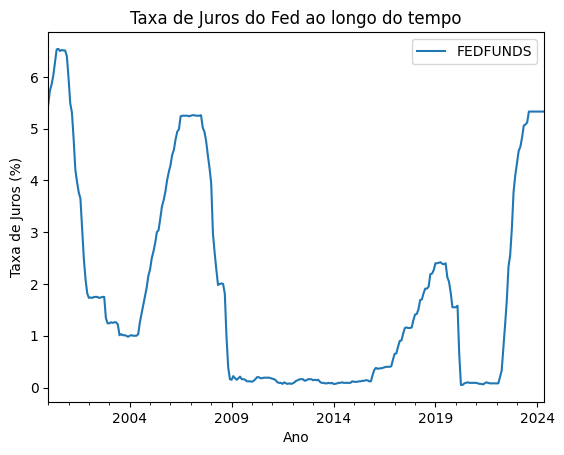

In [4]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime

# Definir o período para os dados que você deseja obter
start = datetime(2000, 1, 1)
end = datetime.now()

# Obter os dados da taxa de juros do Fed (FEDFUNDS)
df = web.DataReader('FEDFUNDS', 'fred', start, end)

# Exibir os primeiros registros
print(df.tail())

# Exibir o gráfico da taxa de juros ao longo do tempo
df.plot(title='Taxa de Juros do Fed ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Taxa de Juros (%)')
plt.show()


In [1]:
import pandas_datareader.data as web
from datetime import datetime

start = datetime(2000, 1, 1)
end = datetime.now()

# PIB dos EUA
gdp = web.DataReader('GDP', 'fred', start, end)

# Índice de Preços ao Consumidor
cpi = web.DataReader('CPIAUCSL', 'fred', start, end)

print(gdp.tail())
print(cpi.tail())


                  GDP
DATE                 
2023-01-01  26813.601
2023-04-01  27063.012
2023-07-01  27610.128
2023-10-01  27956.998
2024-01-01  28255.928
            CPIAUCSL
DATE                
2023-12-01   308.742
2024-01-01   309.685
2024-02-01   311.054
2024-03-01   312.230
2024-04-01   313.207
